# COMP 562 Final Project Analysis

#### Authors:
Cooper Lee, James Tuong, Nathaniel Turner, Alan Vasquez

In [22]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%pip install mlxtend --quiet
from sklearn.model_selection import train_test_split
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# import sklearn #need to figure out what parts of sklearn to import that we'll use

Note: you may need to restart the kernel to use updated packages.


Loading in the dataset and splitting into test and training set (may want to do each time for the different methods)

In [36]:
dpath = "data/heart.csv"
feature_names = ["age","sex","cp","trtbps","chol","fbs","restecg","thalachh",
                                 "exng","oldpeak","slp","caa","thall", "output"]

data = np.genfromtxt(dpath, delimiter=",", skip_header=1, names=feature_names)

heart_data = np.array([data[i] for i in feature_names[:-1]]).T
heart_attack_odds = data["output"]

In [37]:
DataFrame = pd.DataFrame(data).head()
DataFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(heart_data, heart_attack_odds, test_size=0.3,
                                                    random_state=1, stratify=heart_attack_odds)

## Method 1: Binary Tree

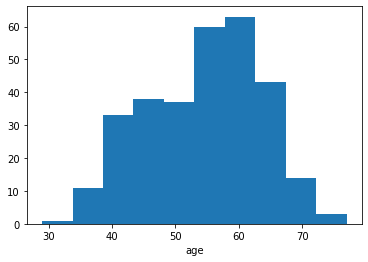

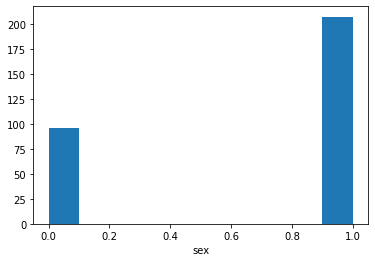

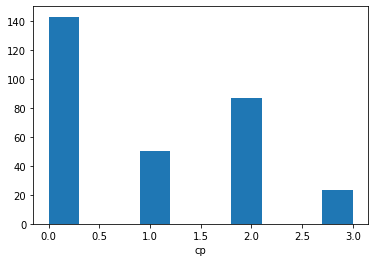

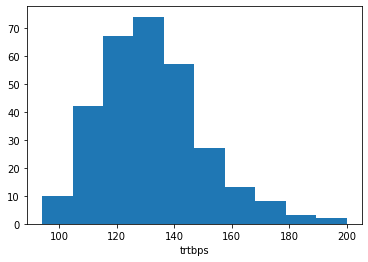

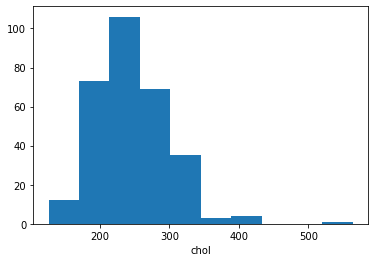

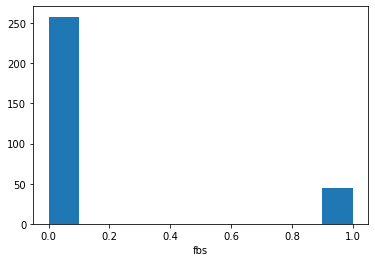

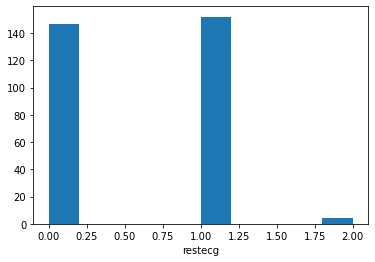

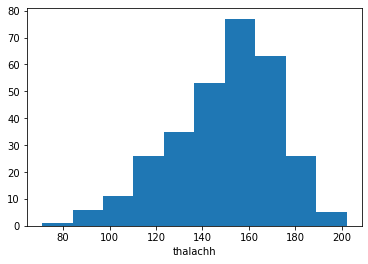

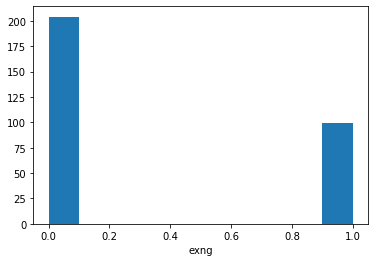

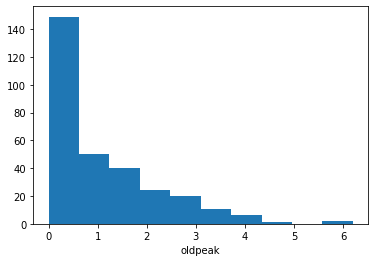

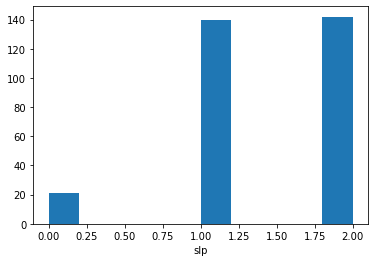

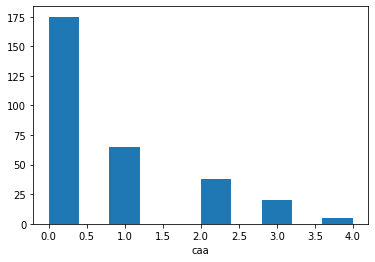

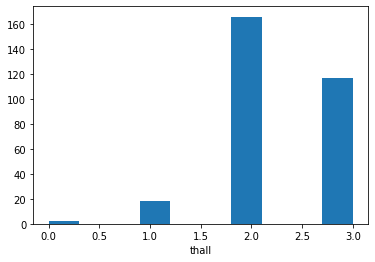

In [38]:
for i in range(len(feature_names)-1):
    plt.figure()
    plt.hist(heart_data[:,i])
    plt.xlabel(feature_names[i])

## Method 2: Random Forest

In [26]:
forest = RandomForestClassifier(criterion='gini',
                                 max_depth = 8,
                                 n_estimators=10,
                                 random_state=4,
                                 n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, n_jobs=2, random_state=4)

In [27]:
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.868


## Method 3: Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)
clf.predict(X_test)

clf.predict_proba(X_test)


clf.score(X_test, y_test)

0.8571428571428571